# Modelado de un sistema con ipython

Uso de ipython para el modelado de un sistema a partir de los datos obtenidos en un ensayo.

In [3]:
#Importamos las librerías utilizadas
import numpy as np
import pandas as pd
import seaborn as sns

In [4]:
#Mostramos las versiones usadas de cada librerías
print ("Numpy v{}".format(np.__version__))
print ("Pandas v{}".format(pd.__version__))
print ("Seaborn v{}".format(sns.__version__))

Numpy v1.9.2
Pandas v0.16.2
Seaborn v0.6.0


In [6]:
#Abrimos el fichero csv con los datos de la muestra
datos = pd.read_csv('datos.csv')

In [7]:
datos = datos[(datos['Diametro X'] >= 1.2) & (datos['Diametro Y'] >= 1.2)]

In [8]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [11]:
#Mostramos un resumen de los datos obtenidoss
datos.describe()
datos.describe().loc['mean',['Diametro X', 'Diametro Y']]

Diametro X    1.626539
Diametro Y    1.552305
Name: mean, dtype: object

In [12]:
#Almacenamos en una lista las columnas del fichero con las que vamos a trabajar
#columns = ['Diametro X', 'Diametro Y', 'RPM TRAC']
columns = ['Diametro X', 'RPM TRAC']

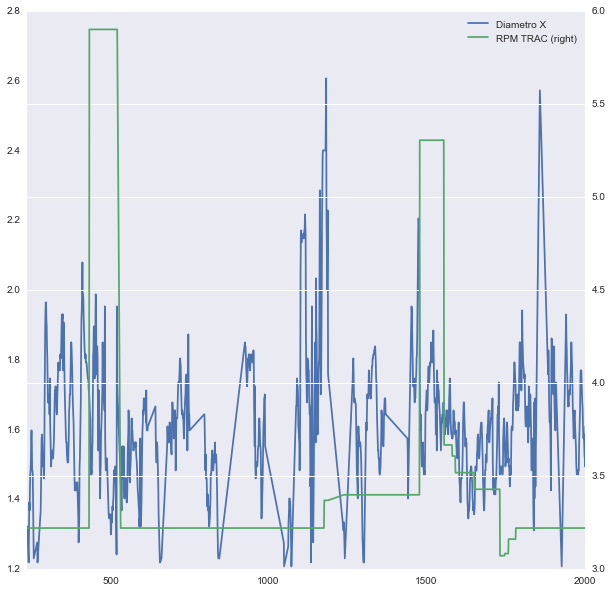

In [13]:
#Mostramos en varias gráficas la información obtenida tras el ensayo
datos[columns].plot(secondary_y=['RPM TRAC'],figsize=(10,10))
#datos[columns].plot(figsize=(10,10)).hlines(1,3,1,colors='r')
#datos_filtrados['RPM TRAC'].plot(secondary_y=True,style='g',figsize=(20,20)).set_ylabel=('RPM')


In [21]:
# Buscamos el polinomio de orden 4 que determina la distribución de los datos
reg = np.polyfit(datos['time'],datos['Diametro X'],9)
# Calculamos los valores de y con la regresión
ry = np.polyval(reg,datos['time'])
#print ('P(x)= {} {}*X {}*X^2 {}*X^3 {}*X^4'.format(reg[0],reg[1],reg[2],reg[3],reg[4]) )

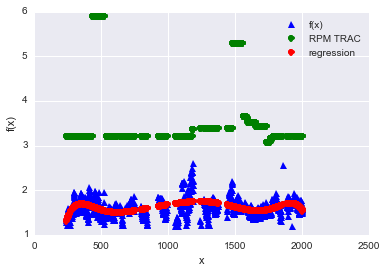

In [17]:
plt.plot(datos['time'],datos['Diametro X'],'b^', label=('f(x)'))
plt.plot(datos['time'],datos['RPM TRAC'],'go', label=('RPM TRAC'))
plt.plot(datos['time'],ry,'ro', label=('regression'))
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')
